In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

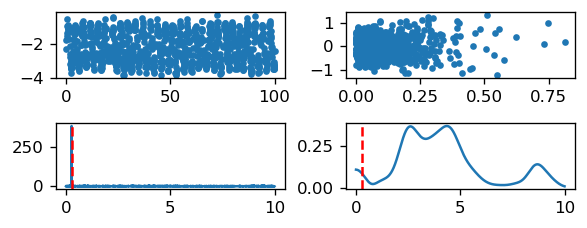

In [2]:
from scipy.signal import lombscargle
f = np.linspace(0.01, 10, 10000)

def create_signal(P, A, M, N=1000, T=100.0):    
    t = np.sort(np.random.rand(N))*T
    s = M + A*(np.sin(2.0*np.pi*t/P) + np.random.randn(N)*0.2)
    return t, s

fig, ax = plt.subplots(2, 2, figsize=(5, 2), tight_layout=True)
P, A, M = 0.1+np.random.rand()*10, 0.1+np.random.rand()*10, np.random.randn()*10
t, s = create_signal(P, A, M)
pgrams = lombscargle(t, s-np.mean(s), 2.*np.pi*f)
dt = t[1:] - t[:-1]
ds = s[1:] - s[:-1]
pgramds = lombscargle(dt, ds-np.mean(ds), 2.*np.pi*f)
ax[0,0].plot(t, s, '.')
ax[0,1].plot(dt, ds, '.')
ax[1,0].plot(f, pgrams)
ax[1,0].axvline(1/P, ls='--', c='r')
ax[1,1].plot(f, pgramds)
ax[1,1].axvline(1/P, ls='--', c='r')

In [3]:
np.random.seed(0)

NN = 100
periods = np.zeros(shape=(NN, 2))
stddev = np.zeros(shape=(NN, 2))

for k in range(NN):
    P, A, M = 0.1+np.random.rand()*10, 0.1+np.random.rand()*10, np.random.randn()*10
    t, s = create_signal(P, A, M)
    pgrams = lombscargle(t, s, f, normalize=True)
    dt = t[1:] - t[:-1]
    ds = s[1:] - s[:-1]
    pgramds = lombscargle(dt, ds, f, normalize=True)
    stddev[k, 0] = np.std(s)
    stddev[k, 1] = np.std(ds)
    periods[k, 0] = f[np.argmax(pgrams)]
    periods[k, 1] = f[np.argmax(pgramds)]

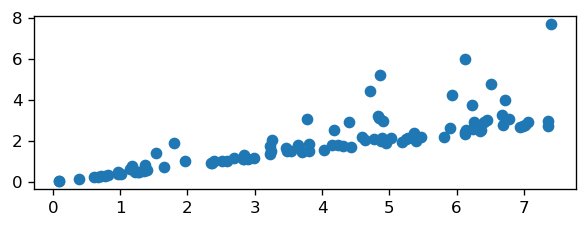

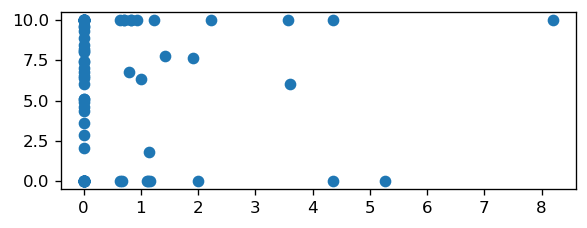

In [4]:
fig, ax = plt.subplots(figsize=(5, 2), tight_layout=True)
ax.scatter(stddev[:, 0], stddev[:, 1])
fig, ax = plt.subplots(figsize=(5, 2), tight_layout=True)
ax.scatter(periods[:, 0], periods[:, 1])